# Проверка времени для разреженного и плотного формата

Запуск измерений...


  0%|          | 0/50 [00:00<?, ?it/s]

Измерения завершены.


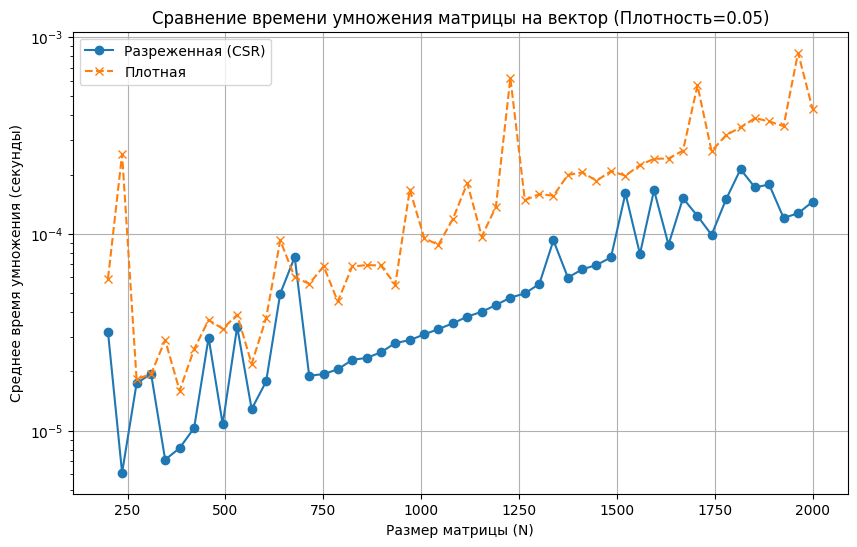

In [16]:
import numpy as np
import scipy.sparse as sps
import timeit
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Диапазон размеров матриц
n_values = np.linspace(200, 2000, dtype=int)
density = 0.05 # Плотность разреженной матрицы (доля ненулевых элементов)

sparse_times = []
dense_times = []

print("Запуск измерений...")
pbar = tqdm(n_values)

for n in pbar:
    pbar.set_description(f"Размер матрицы {n}x{n}")
    # Генерируем случайную разреженную матрицу и плотный вектор
    A_sparse = sps.random(n, n, density=density, format='csr')
    x = np.random.rand(n)
    A_dense = A_sparse.toarray() # Плотный аналог

    # Код для настройки timeit (передаем переменные в окружение)
    setup_code = f"""
import numpy as np
import scipy.sparse as sps
from __main__ import A_sparse, A_dense, x, n
"""

    # Выражения для измерения времени
    sparse_stmt = "A_sparse.dot(x)"
    dense_stmt = "np.dot(A_dense, x)"

    # Измеряем время с помощью timeit (уменьшаем число повторений для больших матриц)
    number_runs = 100

    # --- Измерение для разреженной матрицы ---
    t_sparse = timeit.timeit(stmt=sparse_stmt, setup=setup_code, number=number_runs)
    sparse_times.append(t_sparse / number_runs) # Среднее время на один запуск

    # --- Измерение для плотной матрицы ---
    t_dense = timeit.timeit(stmt=dense_stmt, setup=setup_code, number=number_runs)
    dense_times.append(t_dense / number_runs) # Среднее время на один запуск

print("Измерения завершены.")

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(n_values, sparse_times, marker='o', linestyle='-', label='Разреженная (CSR)')
plt.plot(n_values, dense_times, marker='x', linestyle='--', label='Плотная')

plt.xlabel('Размер матрицы (N)')
plt.ylabel('Среднее время умножения (секунды)')
plt.title(f'Сравнение времени умножения матрицы на вектор (Плотность={density})')
plt.legend()
plt.grid(True)
plt.yscale('log') # Логарифмическая шкала для лучшей визуализации
plt.show()


In [43]:
import numpy as np
import scipy.sparse as sps
import timeit
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

np.random.seed(42)

n_values = np.linspace(200, 2000, dtype=int)
density = 50

# Заранее создаём и храним матрицы и векторы
sparse_matrices = []
dense_matrices = []
vectors = []

for n in n_values:
    A_sparse = sps.random(n, n, density=density/n**2, format='csr', random_state=42)
    A_dense  = A_sparse.toarray()
    x        = np.random.rand(n)
    
    sparse_matrices.append(A_sparse)
    dense_matrices.append(A_dense)
    vectors.append(x)

sparse_times = []
dense_times = []

pbar = tqdm(range(len(n_values)))

for i in pbar:
    pbar.set_description(f"Размер матрицы {n_values[i]}x{n_values[i]}")
    n = n_values[i]
    A_sparse = sparse_matrices[i]
    A_dense  = dense_matrices[i]
    x        = vectors[i]

    # Прогрев (не меряем это время, просто вызываем 1 раз)
    A_sparse.dot(x)
    A_dense.dot(x)

    # Параметры timeit
    number_runs = 200   # В каждом "повторе" делаем 200 умножений
    repeat_runs = 5     # Сколько серий замеров делаем

    setup_code = """
import numpy as np
import scipy.sparse as sps
from __main__ import A_sparse, A_dense, x
"""

    # Собираем многократные замеры и берём медиану
    times_sparse = timeit.repeat(stmt="A_sparse.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)
    times_dense  = timeit.repeat(stmt="A_dense.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)

    median_sparse = np.median(times_sparse) / number_runs
    median_dense  = np.median(times_dense)  / number_runs

    sparse_times.append(median_sparse)
    dense_times.append(median_dense)


  0%|          | 0/50 [00:00<?, ?it/s]

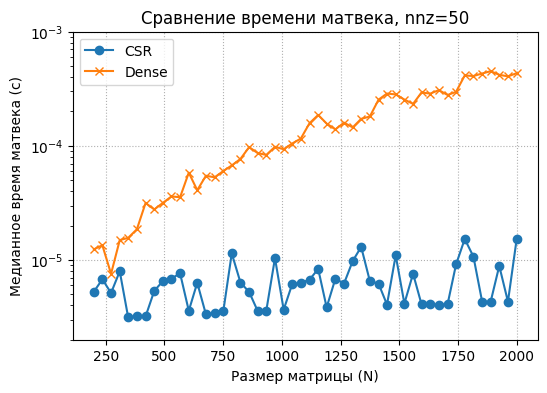

In [45]:
# Построение графика
plt.figure(figsize=(6, 4))
plt.plot(n_values, sparse_times, marker='o', label='CSR')
plt.plot(n_values, dense_times, marker='x', label='Dense')
plt.yscale('log')
plt.grid(linestyle=':')
plt.xlabel('Размер матрицы (N)')
plt.ylabel('Медианное время матвека (с)')
plt.title(f'Сравнение времени матвека, nnz={density}')
plt.ylim(2e-6,1e-3)
plt.legend()
plt.savefig('sparse_fixed_nnz.pdf')
plt.show()

In [49]:
import numpy as np
import scipy.sparse as sps
import timeit
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

np.random.seed(42)

n_values = np.linspace(200, 2000, dtype=int)
density = 0.01

# Заранее создаём и храним матрицы и векторы
sparse_matrices = []
dense_matrices = []
vectors = []

for n in n_values:
    A_sparse = sps.random(n, n, density=density, format='csr', random_state=42)
    A_dense  = A_sparse.toarray()
    x        = np.random.rand(n)
    
    sparse_matrices.append(A_sparse)
    dense_matrices.append(A_dense)
    vectors.append(x)

sparse_times = []
dense_times = []

pbar = tqdm(range(len(n_values)))

for i in pbar:
    pbar.set_description(f"Размер матрицы {n_values[i]}x{n_values[i]}")
    n = n_values[i]
    A_sparse = sparse_matrices[i]
    A_dense  = dense_matrices[i]
    x        = vectors[i]

    # Прогрев (не меряем это время, просто вызываем 1 раз)
    A_sparse.dot(x)
    A_dense.dot(x)

    # Параметры timeit
    number_runs = 200   # В каждом "повторе" делаем 200 умножений
    repeat_runs = 5     # Сколько серий замеров делаем

    setup_code = """
import numpy as np
import scipy.sparse as sps
from __main__ import A_sparse, A_dense, x
"""

    # Собираем многократные замеры и берём медиану
    times_sparse = timeit.repeat(stmt="A_sparse.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)
    times_dense  = timeit.repeat(stmt="A_dense.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)

    median_sparse = np.median(times_sparse) / number_runs
    median_dense  = np.median(times_dense)  / number_runs

    sparse_times.append(median_sparse)
    dense_times.append(median_dense)


  0%|          | 0/50 [00:00<?, ?it/s]

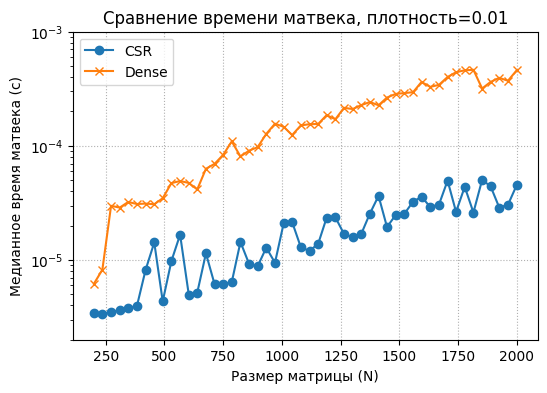

In [50]:
# Построение графика
plt.figure(figsize=(6, 4))
plt.plot(n_values, sparse_times, marker='o', label='CSR')
plt.plot(n_values, dense_times, marker='x', label='Dense')
plt.yscale('log')
plt.grid(linestyle=':')
plt.xlabel('Размер матрицы (N)')
plt.ylabel('Медианное время матвека (с)')
plt.title(f'Сравнение времени матвека, плотность={density}')
plt.ylim(2e-6,1e-3)
plt.legend()
plt.savefig('sparse_fixed_density.pdf')
plt.show()